[0.1, 0.06803664340641498, 5e-324, 5e-324, 4.65841735990745e-310, 4.65841735990616e-310, 1.33e-322, 6.903752104429e-310, 7.002586111e-313, 1.5e-323, 4.65853205133356e-310, 1.90979621325e-313, 4.6584173599061e-310, 4.03179200417e-313, 4.6585320513296e-310, 4.4561911624e-313, 6.90370110632647e-310, 8.063584007e-313, 6.9037520560509e-310, 6.90372420268035e-310, 6.15378779523e-313, 5e-324, 7.8513844279e-313, 6.9037520962121e-310, 1.9097962131e-313, 0.0, 4.65841735990685e-310, 4.65853205132486e-310, 2.5463949505e-313, 4.6585320513201e-310, 7.85138442795e-313, 4.65841735990616e-310, 8.4879831644e-314, 6.9037693272084e-310, 2.5e-323, 5.517189058e-313, 1e-323, 8.4879831723e-314, 6.90375207655976e-310, 4.6585320513786e-310, 6.9037011063267e-310, 4.6585320513474e-310, 1.4e-322, 8.4879831723e-314, 4.6585320513529e-310, 6.9037520962066e-310, 4.65853205135095e-310, 1e-323, 4.6585320513715e-310, 6.9037693272084e-310, 6.90376977089637e-310, 4.65841735990745e-310, 5e-324, 3.3951932665e-313, 6.90376937

/usr/lib/python3.7/site-packages/ipykernel_launcher.py:52: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


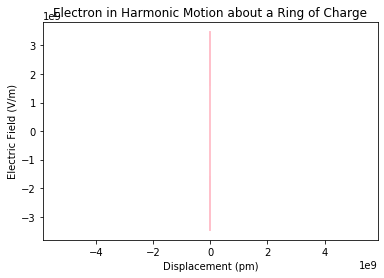

In [6]:
from matplotlib import pyplot as plt
from matplotlib import animation
from matplotlib.patches import Circle
from numpy import sin, cos, pi
import numpy as np
from scipy.integrate import odeint
from IPython.display import HTML


#In S.I Units

def E_of_ring(x, R = 1, k=1/(4*np.pi*8.85e-12)):
    return k*x/(x**2+R**2)**(3/2)


def charged_ring_ode(conditions, t, q=-1.60e-16, m = 9.11e-31):
    x, v = conditions
    
    dydt = [v, (q/m)*E_of_ring(x)]
    return dydt

x_inital = 0.1
v_inital = 1e-6

t_list = np.linspace(0, 10, 300)

solutions = odeint(charged_ring_ode, [x_inital, v_inital], t_list)
# odeint solves for θ and ω over the interval in t_list, it pases conditions = [θ_inital, ω_inital] 
# for the first call of simple_pendulum_ode().

x_solution_list = [i[0] for i in solutions]
#y_list = [0 for x in x_solution_list]
#x_list = [x[0] for x in x_solution_list]

print(x_solution_list)

fig = plt.figure()

ax = fig.add_subplot(111, aspect='equal', autoscale_on=False,
                     xlim=(-2, 2), ylim=(-2, 2))

time_text = ax.text(0.02, 0.95, '', transform=ax.transAxes)
energy_text = ax.text(0.02, 0.90, '', transform=ax.transAxes)

sf = 0.01

patch = Circle((0, 0), radius = 0.02, color ='royalblue')


def init():
    
    ax = plt.axes()
    ax.set_aspect('equal', 'datalim')

    plt.xlabel('Displacement (pm)')
    plt.ylabel('Electric Field (V/m)')
    plt.title('Electron in Harmonic Motion about a Ring of Charge')
    x_list = np.linspace(-2, 2, 300)
    E_list = np.array([E_of_ring(x) for x in x_list])
    plt.plot(x_list, E_list, color = 'pink')
    
    
    time_text.set_text('')
    energy_text.set_text('')
    
    
    ax.add_patch(patch)
    return patch, time_text, energy_text

def animate(i):
    x, y = patch.center
    
    x = x_solution_list[i]
    y = E_of_ring(x_solution_list[i])
    
    
    time_text.set_text('time = 1')
    energy_text.set_text('energy = 1')
    
    patch.center = (x, y)
    return patch, time_text, energy_text


anim = animation.FuncAnimation(fig, animate, 
                               init_func=init, 
                               frames=300, 
                               interval=20,
                               blit=True)


HTML(anim.to_html5_video())